In [61]:
# 数据来源: <Python读财> --- 互联网数据分析师岗位分析

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark',{'font.sans-serif':['simhei','Arial']})
pd.set_option("display.max_column",None)
pd.set_option("display.max_row",None)

path="E:\\study\\demo\\Data_Demo\\Python\\resource\\datasets\\lagou.csv"
df = pd.read_csv(path)
columns= ["positionName","companyShortName","city","companySize","education","financeStage","industryField","salary","workYear","hitags","companyLabelList","job_detail"]
df = df[columns].drop_duplicates()
df[:5]

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,hitags,companyLabelList,job_detail
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,15k-30k,3-5年,"['免费班车', '新婚红包', '定期调薪', '电脑补贴', '生子红包', '地铁周边...","['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,10k-18k,1-3年,NaN,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,20k-30k,3-5年,NaN,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,33k-50k,3-5年,NaN,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",10k-15k,1-3年,NaN,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...


In [62]:
cond_1 = df["positionName"].str.contains("数据分析")
cond_2 = ~df["positionName"].str.contains("实习")

df = df[cond_1 & cond_2]
df.drop(["positionName"],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

df["salary"] = df["salary"].str.lower().str.extract(r'(\d+)[k]-(\d+)k').applymap(lambda x:int(x)).mean(axis=1)
df["job_detail"] = df["job_detail"].str.lower().fillna("")
df["Python/R"] = df["job_detail"].map(lambda x:1 if('python' in x) or ('r' in x) else 0)
df["SQL"] = df["job_detail"].map(lambda x:1 if('sql' in x) or ('hive' in x) else 0)
df["Tableau"] = df["job_detail"].map(lambda x:1 if 'tableau' in x else 0)
df["Excel"] = df["job_detail"].map(lambda x:1 if 'excel' in x else 0)

def clean_industry(industry):
    industry = industry.split(",")
    if industry[0] == "移动互联网" and len(industry)>1:
        return industry[1]
    else:
        return industry[0]

df["industryField"] = df.industryField.map(clean_industry)
df[:5]

,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,hitags,companyLabelList,job_detail,Python/R,SQL,Tableau,Excel
0,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['免费班车', '新婚红包', '定期调薪', '电脑补贴', '生子红包', '地铁周边...","['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1
1,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,NaN,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,1,1,0,1
2,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,NaN,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0
3,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,NaN,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0
4,WPIC,北京,50-150人,本科,未融资,电商,12.5,1-3年,NaN,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,1,0,0,0


Text(0, 0.5, '')

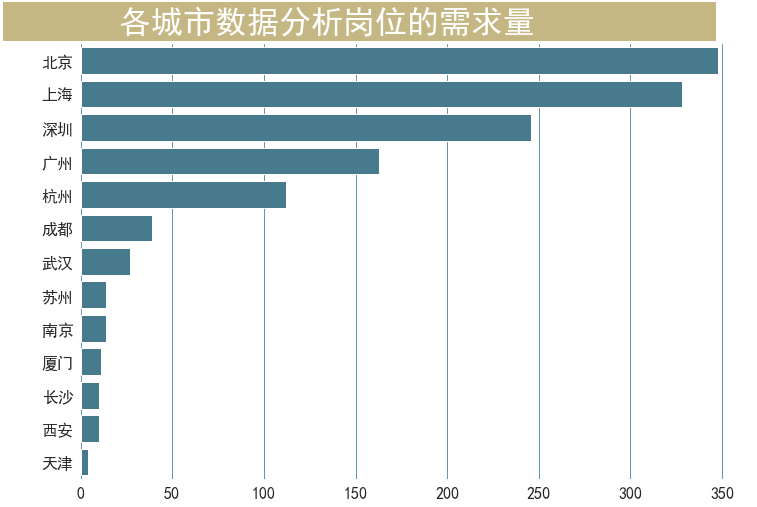

In [63]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y="city",order=df["city"].value_counts().index,data=df,color='#3c7f99')
plt.box(False)
fig.text(x=0.04,y=0.90,s='       各城市数据分析岗位的需求量           ',fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
plt.tick_params(labelsize=16)
ax.xaxis.grid(color='#3c7f99')
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

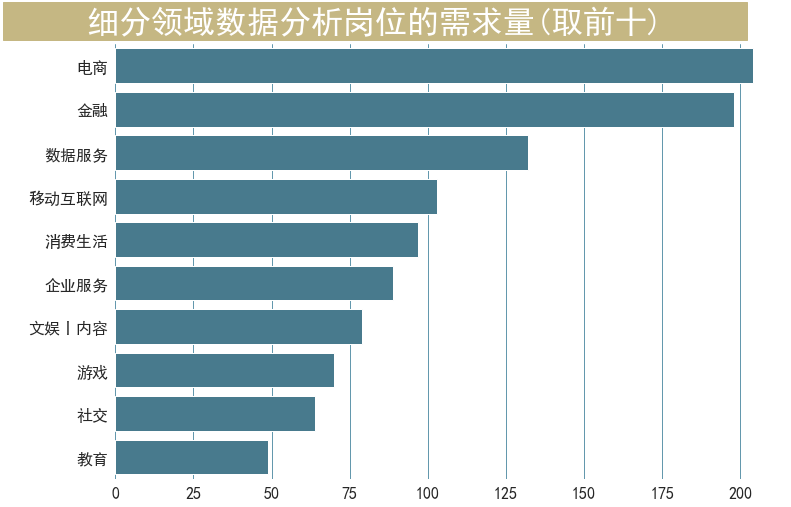

In [64]:
industry_index = df["industryField"].value_counts()[:10].index
industry = df.loc[df["industryField"].isin(industry_index),'industryField']

fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y=industry.values,order=industry_index,color='#3c7f99')
plt.box(False)
fig.text(x=0,y=0.90,s='     细分领域数据分析岗位的需求量(取前十)     ',fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
plt.tick_params(labelsize=16)
ax.xaxis.grid(color='#3c7f99')
plt.xlabel('')
plt.ylabel('')

d:\envir\python\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, '')

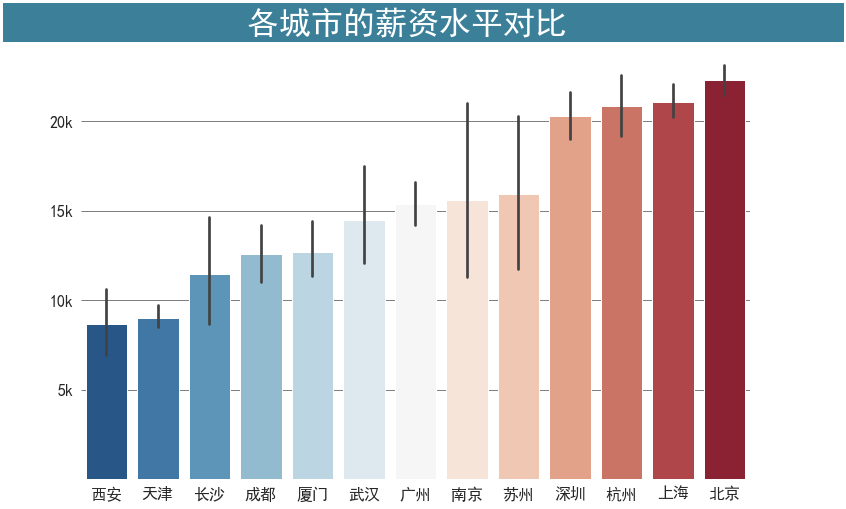

In [77]:
fig,ax = plt.subplots(figsize=(12,8))
city_order = df.groupby("city")["salary"].mean().sort_values().index.tolist()

sns.barplot(x="city",y="salary",order=city_order,data=df,ci=95,palette="RdBu_r")
fig.text(x=0.04,y=0.90,s='               各城市的薪资水平对比                 ',fontsize=32,weight='bold',color='white',backgroundcolor='#3c7f99')
plt.tick_params(labelsize=16)
ax.yaxis.grid(linewidth=0.5,color='black')
ax.set_yticklabels([" ","5k","10k","15k","20k"])
plt.box(False)
plt.xlabel('')
plt.ylabel('')

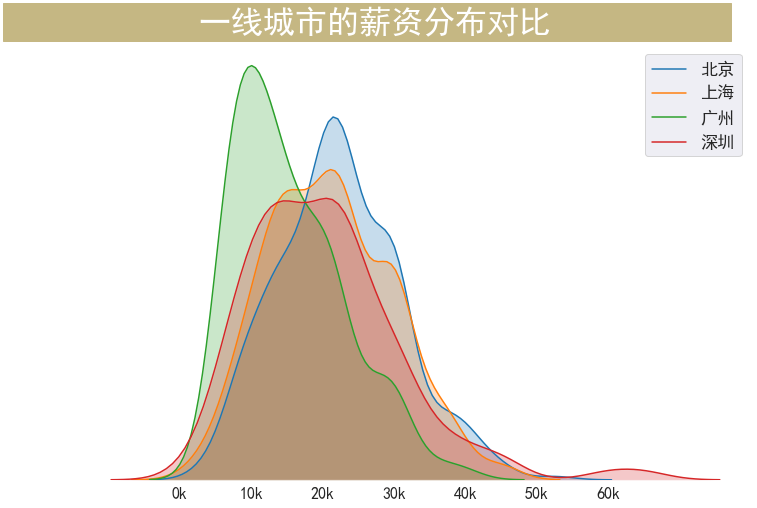

In [81]:
fig,ax = plt.subplots(figsize=(12,8))
fig.text(x=0.04,y=0.90,s='            一线城市的薪资分布对比           ',fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
sns.kdeplot(df[df["city"]=='北京']["salary"],shade=True,label="北京")
sns.kdeplot(df[df["city"]=='上海']["salary"],shade=True,label="上海")
sns.kdeplot(df[df["city"]=='广州']["salary"],shade=True,label="广州")
sns.kdeplot(df[df["city"]=='深圳']["salary"],shade=True,label="深圳")
plt.tick_params(labelsize=16)
plt.box(False)
plt.xticks(np.arange(0,61,10),[str(i)+"k" for i in range(0,61,10)])
plt.yticks([])
plt.legend(fontsize='xx-large')


In [83]:
corr = df.pivot_table(index="city",columns="workYear",values="salary")
corr = corr[["应届毕业生","1-3年","3-5年","5-10年"]]
corr.loc[city_order]

workYear,应届毕业生,1-3年,3-5年,5-10年
city,,,,
西安,12.000000,6.250000,11.000000,NaN
天津,NaN,8.500000,9.000000,NaN
长沙,NaN,10.500000,11.000000,18.250000
成都,10.500000,9.500000,15.833333,18.333333
厦门,10.000000,11.375000,14.400000,NaN
武汉,9.000000,6.666667,17.300000,22.250000
广州,8.727273,10.915094,18.508621,24.800000
南京,12.500000,11.625000,21.000000,NaN
苏州,NaN,10.583333,20.750000,30.000000


Text(69.078125, 0.5, '')

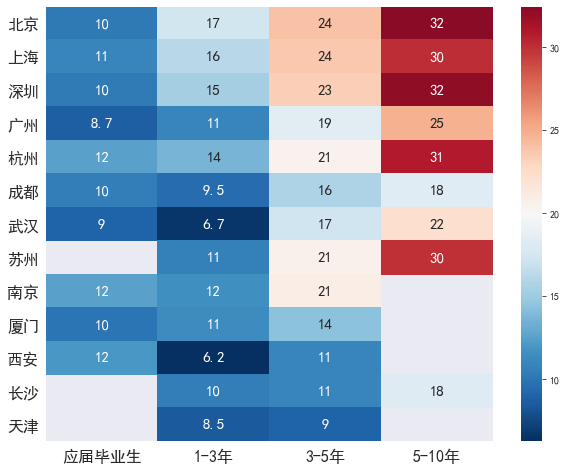

In [19]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr.loc[df["city"].value_counts().index],cmap="RdBu_r",center=20,annot=True,annot_kws={'fontsize':15})
plt.tick_params(labelsize=16,labelrotation=0)
plt.xlabel("")
plt.ylabel("")

In [20]:
py_rate = df["Python/R"].value_counts(normalize=True).loc[1]
sql_rate = df["SQL"].value_counts(normalize=True).loc[1]
tableau_rate = df["Tableau"].value_counts(normalize=True).loc[1]
excel_rate = df["Excel"].value_counts(normalize=True).loc[1]
print(("职位技能需求: "))
print("Python/R: ",py_rate)
print("SQL: ",sql_rate)
print("Tableau: ",tableau_rate)
print("Excel: ",excel_rate)

def get_level(x):
    if x["Python/R"]==1:
        x["skill"]="Python/R"
    elif x["SQL"]==1:
        x["skill"]="SQL"
    elif x["Excel"]==1:
        x["skill"]="Excel"
    else:
        x["skill"]='其他'
    return x

df = df.apply(get_level,axis=1)

职位技能需求: 
Python/R:  0.6078431372549019
SQL:  0.6070889894419306
Tableau:  0.09502262443438914
Excel:  0.3310708898944193


Text(0, 0.5, '技能')

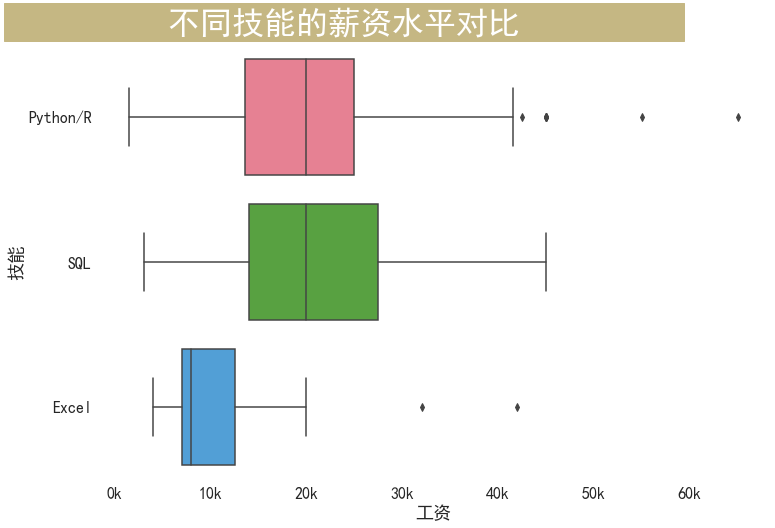

In [21]:
fig,ax = plt.subplots(figsize=(12,8))
fig.text(x=0.02,y=0.90,s='          不同技能的薪资水平对比          ',fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
sns.boxplot(y="skill",x="salary",data=df.loc[df.skill!="其他"],palette="husl",order=["Python/R","SQL","Excel"])
plt.tick_params(labelsize=16)
plt.xticks(np.arange(0,61,10),[str(i)+"k" for i in range(0,61,10)])
plt.box(False)
plt.xlabel('工资',fontsize=18)
plt.ylabel('技能',fontsize=18)
